# Stack Overflow Dataset 2017

The CRISP-DM Process (Cross Industry Process for Data Mining)

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

<h3>The first two steps of CRISP-DM are:</h3>

<h3>Business Understanding</h3> - A look into the carrer of data science

1.How do data science salaries compare to other career salaries?

2.What are the most popular languages and tools among data scientists?

3.Across all stack overflow users what are the most popular IDEs.

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.float_format = "{:.2f}".format # two decimal places

### helper functions ##
flatten = lambda l: [item for sublist in l for item in sublist]  ## takes a list(list) -> list


def createDummies(column, _data):
    _data[column].fillna("", inplace=True)
    uniqueVals = set(flatten(list(map(lambda str: str.split("; "),
                                      list(_data[column].unique())))))
    uniqueVals.remove("")

    _dummies = pd.DataFrame(0, index=_data.index, columns=uniqueVals)
    for dummyCol in _dummies.columns:
        dummies = _data[column].map(lambda row: dummyCol in row)
        _dummies[dummyCol] = dummies

    return _dummies, uniqueVals

In [3]:
df=pd.read_csv("survey-results-public.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
schema= pd.read_csv("survey-results-schema.csv")
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


<h1>Data Understanding</h1>


In [5]:
df.shape # shape of the dataset

(51392, 154)

In [8]:
col=df.columns
print(col) #column of the dataset

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)


<h3>To answer the 3 qestions we need to focus on 4 coloumns of our stack datset</h3>

1. DeveloperType
2. Salary
3. HaveWorked Language
4. IDE


In [42]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing

most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [44]:
column_name= 'Data scientist'

df[df['DeveloperType'] == column_name]['Salary']

813               NaN
1319              NaN
1426              NaN
1774     40100.250627
1991              NaN
             ...     
50561             NaN
50697             NaN
50844             NaN
51248     7634.708560
51256    75757.575758
Name: Salary, Length: 249, dtype: float64

<h3>

In [46]:
df.groupby(['DeveloperType']).mean()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
DeveloperType,,,,,,,
,26354.129429,6.669713,6.618450,4.719229,8.296391,75940.860215,33133.090306
Data scientist,26615.321285,7.134146,6.974026,7.213483,8.650685,63447.118408,NaN
Data scientist; Database administrator,27571.342105,6.945946,6.666667,5.714286,8.608696,61496.087361,NaN
Data scientist; Database administrator; DevOps specialist,7537.000000,4.000000,6.500000,NaN,7.000000,NaN,NaN
Data scientist; Database administrator; Other,24129.000000,7.000000,6.500000,NaN,5.500000,64587.973274,NaN
...,...,...,...,...,...,...,...
Web developer; Systems administrator; DevOps specialist; Other,29838.300000,8.000000,7.600000,2.000000,8.300000,82963.636854,NaN
Web developer; Systems administrator; DevOps specialist; Quality assurance engineer,22259.411765,8.117647,8.117647,4.000000,8.083333,71503.136458,NaN
Web developer; Systems administrator; DevOps specialist; Quality assurance engineer; Other,41435.000000,8.666667,8.333333,NaN,7.666667,51612.903226,NaN


In [52]:
possible_vals = ["Other",
"DevOps specialist",
"Machine learning specialist",
"Stats/Math Background",
"Data scientist",
"Embedded Systems",
"Quality assurance engineer",
"Desktop applications developer",
"Systems administrator",
"Web developer",
"Database administrator",
"Graphics programming",
"Mobile developer",
"Graphic designer"]

def clean_and_plot(df,col1,col2,look_for):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    from collections import defaultdict
    new_df = deafaultdict(int)
    for val in look_for:
        for idx in range (df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col1][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1,col2]
    new_df.sort_values('count',ascending=False, inplace=True)
    return new_df
    
#props_df = clean_and_plot(df)

In [97]:
devType = "DeveloperType"
salary = "Salary"
dScien = "Data scientist"
experience = "YearsProgram"
language = "HaveWorkedLanguage"
jobT = "Job Title"
years = "YearsProgram"
yearsN = "YearsProgramNumeric"
ide = "IDE"
stats_long_name = 'Developer with a statistics or mathematics background'
stats_short_name = "Stats/Math Background"
emb_long_name = 'Embedded applications/devices developer'
emb_short_name = "Embedded Systems"

job_dummies, jobTitles = createDummies(devType, df)
language_dummies, languageTitles = createDummies(language, df)





In [98]:
so_data = df.copy()

# 1.How do data science salaries compare to other career salaries?

In [99]:
sal_v_type = pd.melt(so_data.join(job_dummies).loc[:, [salary] + list(jobTitles)], id_vars=salary).dropna()
sal_v_type = sal_v_type[sal_v_type["value"]]
del sal_v_type["value"]
sal_v_type.columns = [salary, jobT]

sal_v_type.loc[sal_v_type[jobT] == stats_long_name, jobT] = stats_short_name
sal_v_type.loc[sal_v_type[jobT] == emb_long_name, jobT] = emb_short_name

output = sal_v_type.groupby(jobT)[salary].mean().sort_values(ascending=False).to_frame()
output.columns = ["Average Salary"]
output

,Average Salary
Job Title,
Other,72344.57
DevOps specialist,66158.20
Machine learning specialist,66023.10
Stats/Math Background,62455.50
Data scientist,61137.33
Embedded Systems,58524.35
Quality assurance engineer,56423.11
Desktop applications developer,56352.86
Systems administrator,56331.94


In [100]:
output['job']=output.index

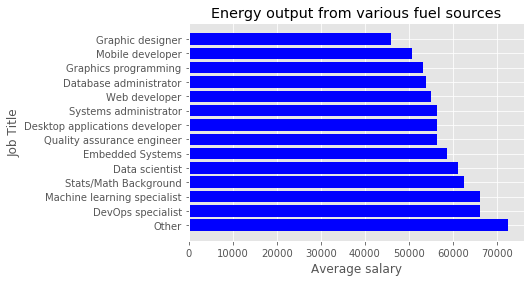

In [101]:
plt.barh(output['job'], output['Average Salary'], color='blue')
plt.ylabel("Job Title")
plt.xlabel("Average salary")
plt.title("Energy output from various fuel sources")



plt.show()

<h3>Study for problem 1</h3>

Data scientist is the 4th most highest paid job in the world with an average salry of $61137.

The most high paying job is DevOps specialist with an avegrage salary of $66158

# 2. the most popular languages and tools among data scientists

In [105]:
datascience_data = so_data[so_data.loc[:, devType].str.contains(dScien, na=False)]

dscien_langauge_dummies, dscien_lang = createDummies(language, datascience_data)
ds_lang = (dscien_langauge_dummies.sum(0).sort_values(ascending=False) / len(dscien_langauge_dummies) * 100.).to_frame()
ds_lang.columns = ["Most popular lang among Data scientist(%)"]
ds_lang['language']=ds_lang.index
ds_lang.head(10)

,Most popular lang among Data scientist(%),language
Java,55.47,Java
SQL,46.17,SQL
JavaScript,45.29,JavaScript
C,43.91,C
Python,38.49,Python
C#,25.12,C#
C++,22.30,C++
PHP,20.72,PHP
R,19.11,R
Scala,7.65,Scala


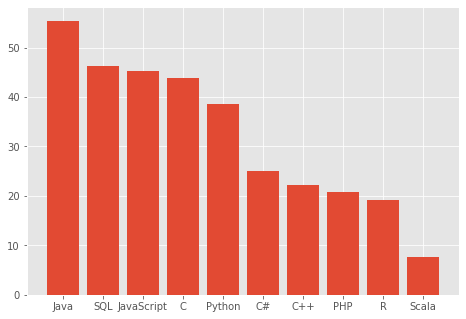

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ds_lang['language'].head(10)
percentage = ds_lang['Most popular lang among Data scientist(%)'].head(10)
ax.bar(langs,percentage)
plt.show()

<h3>Study for Problem 2</h3>

From the above study it can clearly visabel that the Java is the most pouplar language among the data scientist.

Data scientist uses 55% of java where as only 38% of python

# 3.Across all stack overflow users what are the most popular IDEs.

In [111]:
dscien_ide_dummies, ides = createDummies(ide, datascience_data)
output = (dscien_ide_dummies.sum(0) / len(dscien_ide_dummies) * 100).sort_values(ascending=False).to_frame()
output.columns = ["Data Scientists use IDE(%)"]
output['IDE']=output.index
output.head(10)

c:\python\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Data Scientists use IDE(%),IDE
Visual Studio,29.69,Visual Studio
Notepad++,26.08,Notepad++
Vim,25.85,Vim
Sublime Text,20.43,Sublime Text
Eclipse,18.69,Eclipse
IntelliJ,18.33,IntelliJ
IPython / Jupyter,13.40,IPython / Jupyter
Atom,13.30,Atom
PyCharm,12.61,PyCharm
Android Studio,11.89,Android Studio


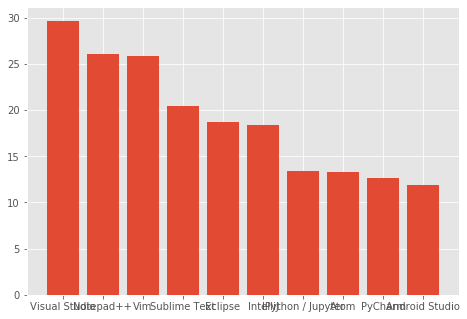

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = output['IDE'].head(10)
percentage = output['Data Scientists use IDE(%)'].head(10)
ax.bar(langs,percentage)
plt.show()

<h3>Study for problem 3</h3>


Visual stdio is the most popular IDE which was used by most of the devlopers throghout the world.

It covers almost 30% of the popularity in the world